# vechicle coupon recommendation

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
data=pd.read_csv('in-vehicle-coupon-recommendation[1].csv')

In [5]:
df=pd.DataFrame(data)

# Preprocessing and EDA

In [7]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [9]:
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [11]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [15]:
#get the number of rows and columns in the dataframe
df.shape

(12684, 26)

In [17]:
#get the name of the columns in the dataframe
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [19]:
#display the datatype of each column
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

# checking missing values

In [7]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

 found missing values and then it remove

In [9]:
df=df.fillna(0)

In [11]:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# checking duplicates

In [13]:
df.duplicated().sum()

74

remove duplicate

In [15]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [19]:
#drop unnecessary column
df = df.drop(columns=['car', 'toCoupon_GEQ5min', 'direction_opp'])

# label encoding

In [21]:
cat_cols = ['destination', 'passanger', 'weather',  'coupon', 'gender','maritalStatus', 'education','age','expiration','income','time','temperature']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [23]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,1,0,2,1,2,4,0,0,0,3,...,3,never,never,0,4~8,1~3,0,0,0,1
1,1,1,2,2,0,2,1,0,0,3,...,3,never,never,0,4~8,1~3,0,0,0,0
2,1,1,2,2,0,1,1,0,0,3,...,3,never,never,0,4~8,1~3,1,0,0,1
3,1,1,2,2,2,2,1,0,0,3,...,3,never,never,0,4~8,1~3,1,0,0,0
4,1,1,2,2,2,2,0,0,0,3,...,3,never,never,0,4~8,1~3,1,0,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  int32 
 1   passanger             12610 non-null  int32 
 2   weather               12610 non-null  int32 
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  int32 
 5   coupon                12610 non-null  int32 
 6   expiration            12610 non-null  int32 
 7   gender                12610 non-null  int32 
 8   age                   12610 non-null  int32 
 9   maritalStatus         12610 non-null  int32 
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  int32 
 12  occupation            12610 non-null  object
 13  income                12610 non-null  int32 
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

In [39]:
# Here we can analyze wheather our data id balanced or not
target_value_count=df['Y'].value_counts()

In [41]:
target_value_count

Y
1    7157
0    5453
Name: count, dtype: int64

In [ ]:
This is slightly imbalanced which does not affect the model accuracy.

In [ ]:
This is slightly imbalanced which does not affect the model accuracy.

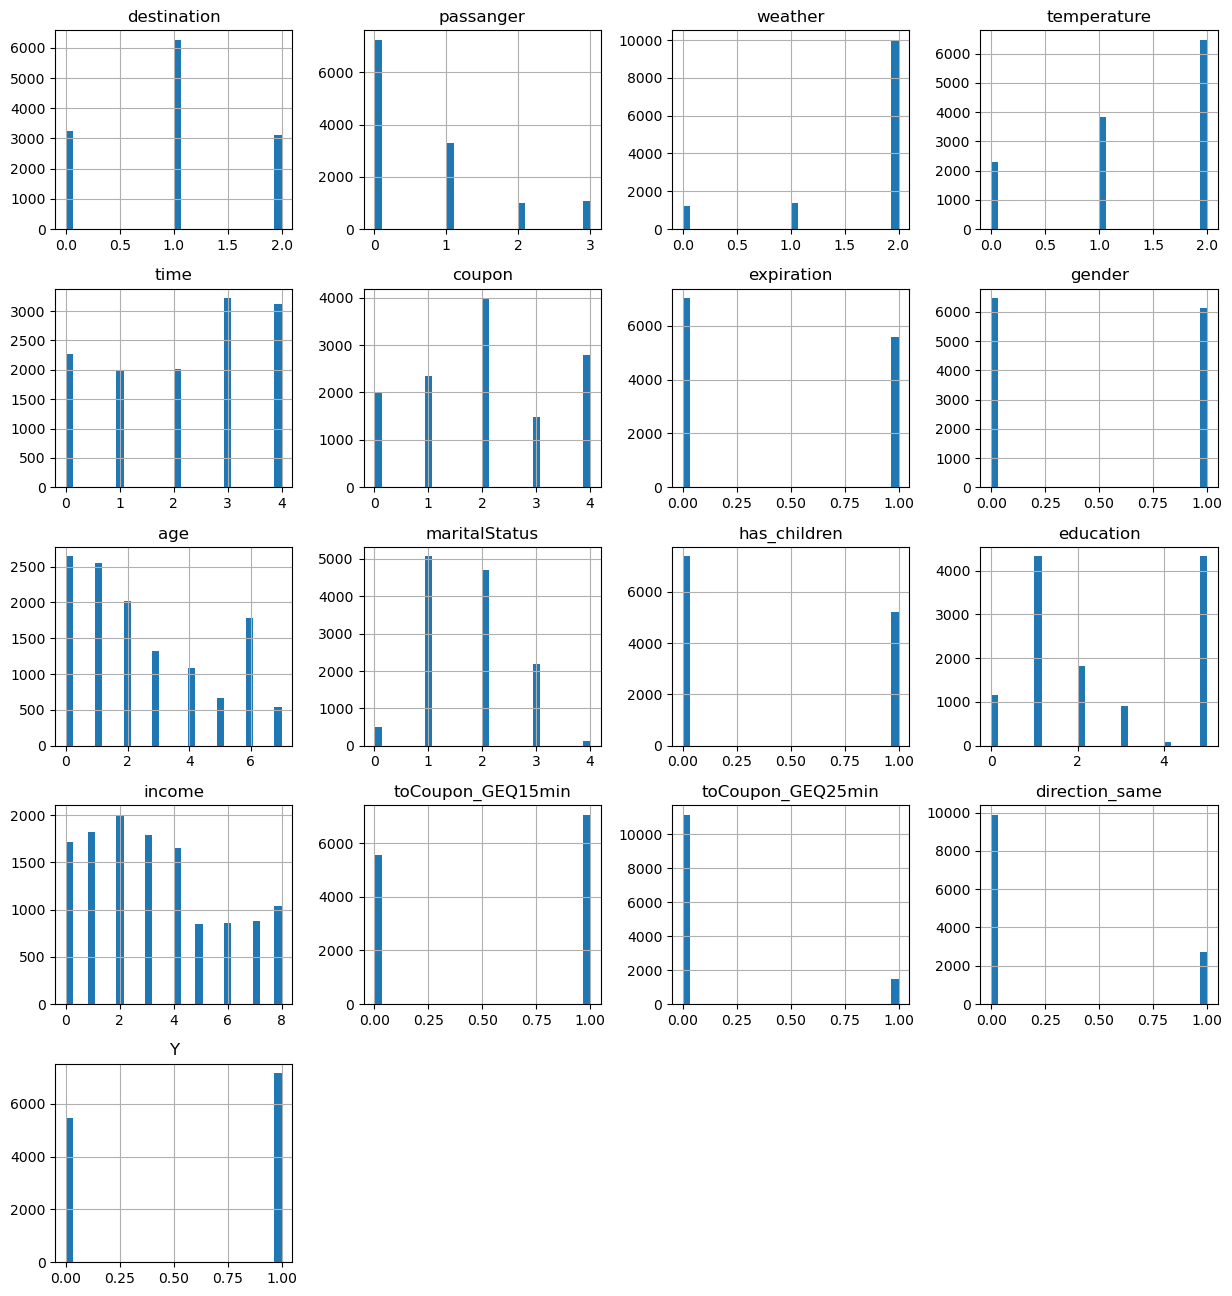

In [63]:
df.hist(figsize=(15, 16), bins=30)
plt.show()

In [25]:
numerical_features = df.select_dtypes(include = 'number')
print(numerical_features)

       destination  passanger  weather  temperature  time  coupon  expiration  \
0                1          0        2            1     2       4           0   
1                1          1        2            2     0       2           1   
2                1          1        2            2     0       1           1   
3                1          1        2            2     2       2           1   
4                1          1        2            2     2       2           0   
...            ...        ...      ...          ...   ...     ...         ...   
12679            0          3        0            1     3       1           0   
12680            2          0        0            1     4       1           0   
12681            2          0        1            0     4       2           0   
12682            2          0        1            0     4       0           0   
12683            2          0        2            2     4       3           1   

       gender  age  marital

Text(0.5, 1.0, 'Box Plot of Coupon recommendation')

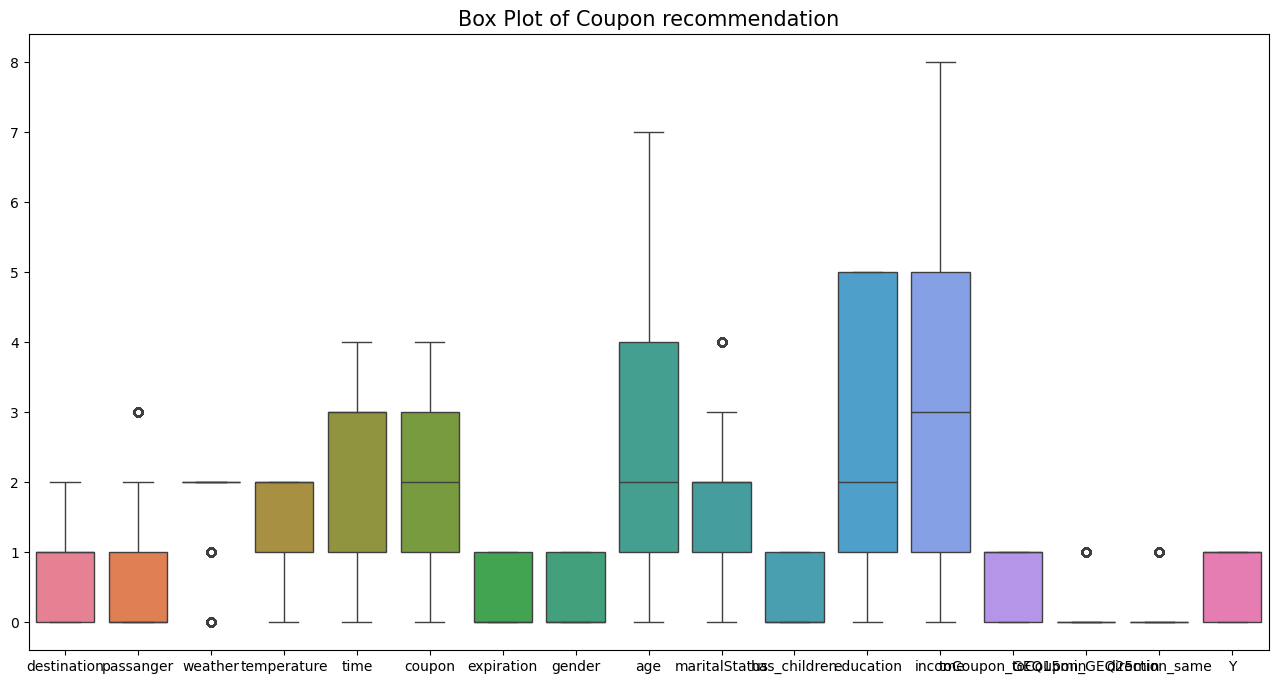

In [27]:
# outlier detection
plt.figure(figsize = (16,8))
sns.boxplot(df[numerical_features.columns])
plt.title("Box Plot of Coupon recommendation", fontsize=15)

In [29]:
def Handling_Outliers(df):
    for col in df.select_dtypes(include = ['int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        #CAPPING OUTLIERS
        df[col]= df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return df

In [31]:
df1 = Handling_Outliers(df)

<Axes: >

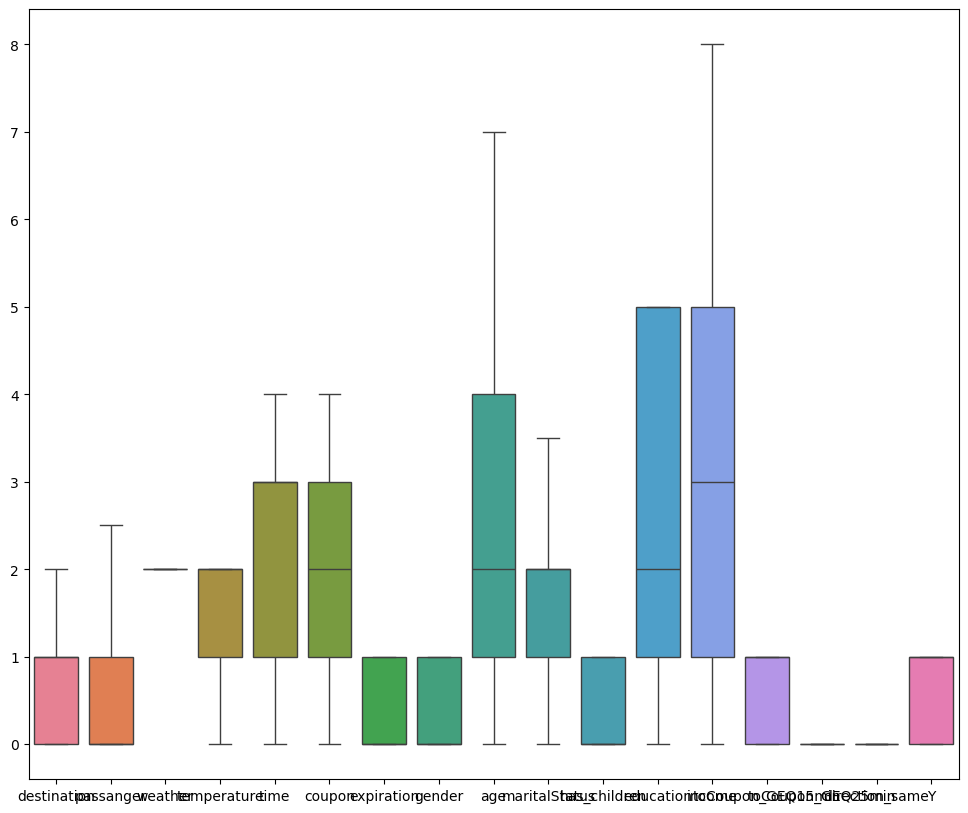

In [73]:
plt.figure(figsize = (12,10))
sns.boxplot(df1)

In [75]:
df1.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'Y'],
      dtype='object')

In [33]:
df1 = df1.drop(columns = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','weather','toCoupon_GEQ25min', 'direction_same'])

In [35]:
df1 = df1.drop(columns = ['occupation'])

In [37]:
df1.skew()

destination          0.013129
passanger            1.298261
temperature         -0.640000
time                -0.272712
coupon               0.050716
expiration           0.231863
gender               0.052046
age                  0.519014
maritalStatus        0.270087
has_children         0.347102
education            0.276123
income               0.453136
toCoupon_GEQ15min   -0.240933
Y                   -0.272796
dtype: float64

In [39]:
correlation=df1.corr()
correlation

,destination,passanger,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,income,toCoupon_GEQ15min,Y
destination,1.000000,-0.114539,-0.032057,0.408021,-0.009177,-0.028068,0.007940,-0.001852,0.002746,-0.004974,0.009344,-0.015102,0.136935,-0.003648
passanger,-0.114539,1.000000,0.058997,-0.398918,0.017802,0.073392,-0.021215,0.004671,-0.020375,0.034051,-0.000161,-0.001666,0.066521,0.052028
temperature,-0.032057,0.058997,1.000000,-0.063353,0.131240,0.127774,-0.025010,-0.027112,0.002405,-0.018599,0.016472,-0.025535,-0.157089,0.059393
time,0.408021,-0.398918,-0.063353,1.000000,0.049971,-0.081604,-0.003386,-0.008422,0.004648,-0.006602,-0.001993,-0.007785,0.003963,-0.048846
coupon,-0.009177,0.017802,0.131240,0.049971,1.000000,0.147022,0.007158,0.002654,-0.000131,-0.010822,-0.001370,0.001963,-0.129636,0.099183
expiration,-0.028068,0.073392,0.127774,-0.081604,0.147022,1.000000,-0.001898,0.006406,-0.012134,0.015050,-0.009639,-0.010902,0.045644,-0.128737
gender,0.007940,-0.021215,-0.025010,-0.003386,0.007158,-0.001898,1.000000,-0.062229,0.057875,-0.162807,0.017116,0.023307,-0.006614,0.043740
age,-0.001852,0.004671,-0.027112,-0.008422,0.002654,0.006406,-0.062229,1.000000,-0.176614,0.305735,0.087845,0.046054,0.026566,-0.036429
maritalStatus,0.002746,-0.020375,0.002405,0.004648,-0.000131,-0.012134,0.057875,-0.176614,1.000000,-0.434105,0.069816,0.073647,-0.049546,0.025303
has_children,-0.004974,0.034051,-0.018599,-0.006602,-0.010822,0.015050,-0.162807,0.305735,-0.434105,1.000000,-0.053792,-0.003546,0.079434,-0.045056


Text(0.5, 1.0, 'correlation of vechicle coupon recommendation')

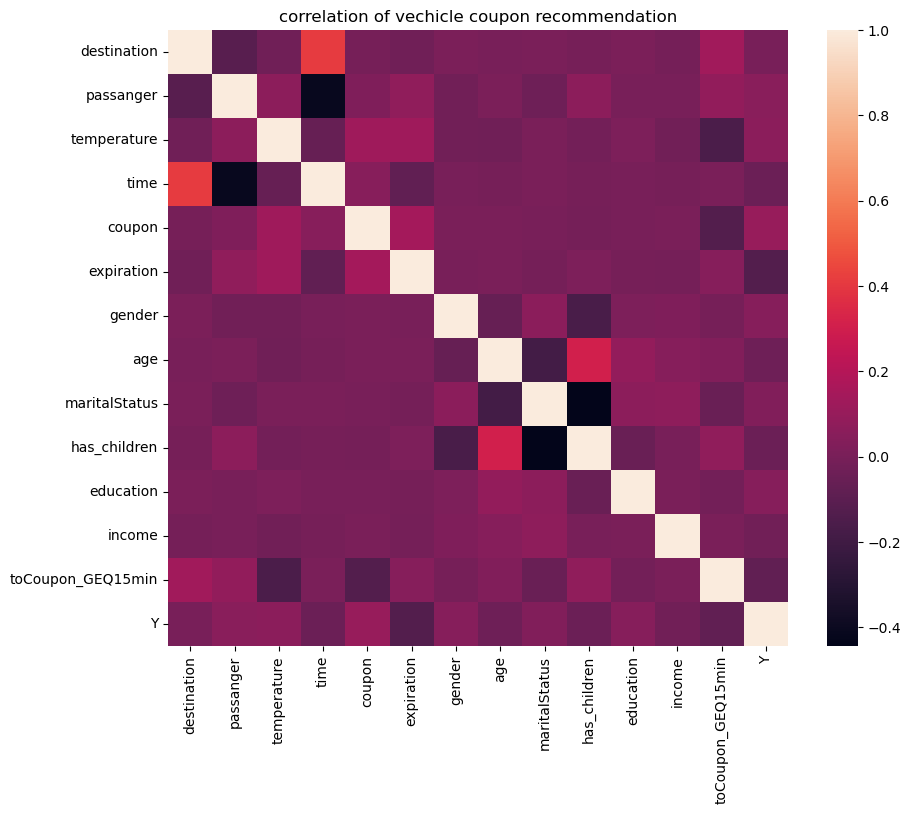

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation)
plt.title('correlation of vechicle coupon recommendation')

In [ ]:
Feature Selection

In [41]:
X = df1.drop(['Y'], axis = 1)
y = df1['Y']

In [43]:
sk =  SelectKBest(score_func = f_classif, k = 10)
x_new = sk.fit_transform(X,y)
selected_features = X.columns[sk.get_support()]
feature_score = pd.DataFrame({'feature':X.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)
print("selected_Fetaures:",selected_features)
print("\nFeature Score:")
print(feature_score)

selected_Fetaures: Index(['passanger', 'temperature', 'time', 'coupon', 'expiration', 'gender',
       'age', 'has_children', 'education', 'toCoupon_GEQ15min'],
      dtype='object')

Feature Score:
              feature       Score
5          expiration  212.477933
4              coupon  125.260529
12  toCoupon_GEQ15min   86.808370
2         temperature   44.631892
1           passanger   34.221237
3                time   30.153213
9        has_children   25.647051
6              gender   24.168192
10          education   23.595580
7                 age   16.754030
8       maritalStatus    8.077431
11             income    7.634258
0         destination    0.167773


In [45]:
X_selected = X[selected_features]

In [97]:
X_selected.columns

Index(['passanger', 'temperature', 'time', 'coupon', 'expiration', 'gender',
       'age', 'has_children', 'education', 'toCoupon_GEQ15min'],
      dtype='object')

# Scalling

In [47]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 0.01297046, -0.71577029, -0.43165088, ...,  1.28023568,
        -0.12214809, -1.12768026],
       [ 0.01297046,  0.34597108,  0.87365311, ...,  1.28023568,
        -0.12214809, -1.12768026],
       [ 0.01297046,  0.34597108,  0.87365311, ...,  1.28023568,
        -0.12214809,  0.88677619],
       ...,
       [ 1.42294894, -0.71577029, -1.73695488, ..., -0.84401471,
         1.09772046, -1.12768026],
       [ 1.42294894, -0.71577029, -1.73695488, ..., -0.84401471,
         1.09772046,  0.88677619],
       [ 1.42294894, -0.71577029,  0.87365311, ..., -0.84401471,
         1.09772046, -1.12768026]])

# Train Test Split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state =42)

In [51]:
x_train.shape

(10088, 13)

In [53]:
x_test.shape

(2522, 13)

In [55]:
print(f""" 
X_train shape : {x_train.shape}
X_test shape : {x_test.shape}
y_train shape : {y_train.shape}
y_test shape : {y_test.shape} 
""")

 
X_train shape : (10088, 13)
X_test shape : (2522, 13)
y_train shape : (10088,)
y_test shape : (2522,) 



# Model Comparison

In [57]:
models ={
    '1.LogisticRegression':LogisticRegression(),
    '2. SVC':SVC(),
    '3. DecisionTreeClassifier':DecisionTreeClassifier(),
    '4. Randomforest':RandomForestClassifier(),
    '5.Gradient Boosting': GradientBoostingClassifier(),
    '6.AdaBoost': AdaBoostClassifier(),
    '7.Naive Bayes':GaussianNB()
}

In [59]:
results ={}
for name,model in models.items():
    print(f"\nTraining Name{name}--->")
    model.fit(x_train,y_train)
    y_pred    = model.predict(x_test)
    accuracy  = accuracy_score(y_test,y_pred)
    results[name]= {
        'model':model,
        'accuracy':accuracy_score,
        'Report':classification_report(y_test,y_pred)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassificationReport")
    print(results[name]['Report'])


Training Name1.LogisticRegression--->
1.LogisticRegression Accuracy: 0.6027

ClassificationReport
              precision    recall  f1-score   support

           0       0.57      0.37      0.45      1106
           1       0.61      0.79      0.69      1416

    accuracy                           0.60      2522
   macro avg       0.59      0.58      0.57      2522
weighted avg       0.60      0.60      0.58      2522


Training Name2. SVC--->
2. SVC Accuracy: 0.6570

ClassificationReport
              precision    recall  f1-score   support

           0       0.65      0.47      0.55      1106
           1       0.66      0.80      0.72      1416

    accuracy                           0.66      2522
   macro avg       0.66      0.64      0.64      2522
weighted avg       0.66      0.66      0.65      2522


Training Name3. DecisionTreeClassifier--->
3. DecisionTreeClassifier Accuracy: 0.6249

ClassificationReport
              precision    recall  f1-score   support

           0

# hyperparameter tuning

In [60]:
gbc = GradientBoostingClassifier(random_state=42)

In [63]:
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],  
    'max_depth': [3, 5, 10, 15, None],         
    'min_samples_split': [2, 5, 10, 15],       
    'min_samples_leaf': [1, 2, 4, 8],          
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   
    'subsample': [0.6, 0.8, 1.0],              
    'max_features': ['sqrt', 'log2', None]     
}

In [65]:
random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_dist,
    n_iter=50,               
    scoring='f1_weighted',   
    cv=5,                    
    verbose=2,              
    random_state=42,
    n_jobs=-1                
)

In [67]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 10, 15, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [69]:
print("Best Parameters:", random_search.best_params_)
print("Best Weighted F1 Score:", random_search.best_score_)

Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.2}
Best Weighted F1 Score: 0.7028431930663259


# Best model

In [71]:
best_model = random_search.best_estimator_

In [73]:
y_pred = best_model.predict(x_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [77]:
print(f"Test Accuracy: {accuracy}")
print(f"Test Weighted F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.6950832672482157
Test Weighted F1 Score: 0.6937561757136859

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64      1106
           1       0.72      0.75      0.74      1416

    accuracy                           0.70      2522
   macro avg       0.69      0.69      0.69      2522
weighted avg       0.69      0.70      0.69      2522



In [ ]:
# Pipelin

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Define the numerical and categorical columns
numerical_cols = ['age', 'temperature', 'has_children', 'toCoupon_GEQ15min']
categorical_cols = ['destination', 'passanger', 'time', 'coupon', 'expiration', 'education', 'maritalStatus', 'gender','income' ]

# Define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', StandardScaler())  # Scale the numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Define the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', GradientBoostingClassifier())
])

# Display the pipeline
print("Pipeline steps:")
print(pipe.named_steps)

Pipeline steps:
{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'temperature', 'has_children',
                                  'toCoupon_GEQ15min']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['destination', 'passanger', 'time', 'coupon',
                                  'expiration', 'education', 'maritalStatus',
                                  'gender', 'income'])]), 'rf': GradientBoostingClassifier()}


In [81]:
pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'temperature',
                                                   'has_children',
                                                   'toCoupon_GEQ15min']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['destination', 'passanger',
                                                   'time', 'coupon',
                                                   'expiration', 'education',
                                                   'maritalStatus', 'gender',
                                                   'income'])])),
                ('rf', GradientBoostingClassifier())])

In [83]:
 #Save the trained pipeline
joblib.dump(pipe, 'pipeline.joblib')

['pipeline.joblib']

In [85]:
loaded_pipe = joblib.load('pipeline.joblib')

In [87]:
df_test = pd.read_csv('unseen.csv')

In [89]:
df_test.head()

,destination,passanger,temperature,time,coupon,expiration,gender,age,maritalStatus,income,has_children,education,toCoupon_GEQ15min
0,No Urgent Place,Alone,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,0
1,No Urgent Place,Friend(s),80,10AM,Coffee House,2h,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,0
2,No Urgent Place,Friend(s),80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,1
3,No Urgent Place,Friend(s),80,2PM,Coffee House,2h,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,1
4,No Urgent Place,Friend(s),80,2PM,Coffee House,1d,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,1


In [91]:
predictions = loaded_pipe.predict(df_test)

In [93]:
df_test['y_predicted']=predictions

In [95]:
df_test.head()

,destination,passanger,temperature,time,coupon,expiration,gender,age,maritalStatus,income,has_children,education,toCoupon_GEQ15min,y_predicted
0,No Urgent Place,Alone,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,0,1
1,No Urgent Place,Friend(s),80,10AM,Coffee House,2h,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,0,1
2,No Urgent Place,Friend(s),80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,1,0
3,No Urgent Place,Friend(s),80,2PM,Coffee House,2h,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,1,0
4,No Urgent Place,Friend(s),80,2PM,Coffee House,1d,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,1,0


In [99]:
joblib.dump(pipe, 'GBC_model.joblib')


['GBC_model.joblib']